# Case 1 by Banal Team
<hr>

## Table of Contents

* [1 Introcution](#chapter1)
    * [1.1 Data Understanding](#section_1_1)
    * [1.2 Data Import ](#section_1_2)
* [2 Data Preparation](#chapter2)
    * [2.1 Data Cleaning](#section_2_1)
    * [2.2 Data Statistics](#section_2_2)
* [3 Assignment](#chapter3)
    * [3.1 Univariate Visualizations](#section_3_1)
    * [3.2 Data Relationships](#section_3_2)
* [4 Training the Model](#chapter4)
    * [4.1 Linear Regression](#section_4_1)
    * [4.2 Multiple Linear Regression](#section_4_2)
    * [4.3 Linear Regression using statsmodels](#section_4_3)
* [5 Model Evaluation with Visualizations](#chapter5)
    * [5.1 Regression Plot](#section_5_1)
    * [5.2 Residual Plot](#section_5_2)
    * [5.3 Distribution Plot](#section_5_3)
    
---

## 0 About the Dataset

The dataset is parsed data from the website which contains all of the ads of apartments in Almaty. It containt over 20k ads across 10 variables such as price, rooms, area, street, city, ZHK, type, year, actual_floor, total_floors.


## 1 Introduction <a class="anchor" id="chapter1"></a>

### 1.1 Data Understanding <a class="anchor" id="section_1_1"></a>


**Exhibit 1: Variable Description** <a class="anchor" id="exhibit1"></a>
* **price** - price of the property in KZT
* **rooms** - number of rooms (integer number)
* **area** - total area of the property (apartment) in square meters
* **street** - street name of the address
* **city** - name of the city
* **ZHK** - name of the complex 
* **type** - type of the building
* **year** - year of commissioning
* **actual_floor** - floor of the apartment
* **total_floors** - number of storeys in the building

We can classify the various data columns into numerical/categorical attributes:
1. Numerical Attributes: price, rooms, area, year, actual_floor, total_floors
2. Categorical Attributes: street, city, ZHK, type

<hr>

### 1.2 Data Import  <a class="anchor" id="section_1_2"></a>


In [1]:
import pandas as pd

data = pd.read_csv('./css429_case1_#1.csv')
data.head()

,price,rooms,area,street,city,ZHK,type,year,actual_floor,total_floors
0,10 500 000,1,36,Яссауи,Алматы,NaN,NaN,NaN,9.0,9.0
1,40 000 000,3,70,Янушкевича,Алматы,Кок Жер,монолитный,2019.0,10.0,NaN
2,24 500 000,2,49,Янушкевича,Алматы,Кок Жер,монолитный,2019.0,2.0,10.0
3,22 500 000,2,48,Янушкевича,Алматы,Кок Жер,монолитный,2019.0,5.0,10.0
4,35 500 000,3,84,Янушкевича,Алматы,Кок Жер,монолитный,2019.0,8.0,10.0


In [2]:
print("There are", data.shape[0], "rows, and", data.shape[1], "columns in the dataset.")

There are 20001 rows, and 10 columns in the dataset.


<hr>

## 2 Data Preparation <a class="anchor" id="chapter2"></a>

### 2.1 Data Cleaning <a class="anchor" id="section_2_1"></a>

In [3]:
# Strip off empty spaces and convert to numeric
data.price = data.price.astype(str).str.replace(' ', '')

# Convert columns "price" and "year" into numeric values
data['price'] = data['price'].apply(pd.to_numeric)
data['year'] = data['year'].apply(pd.to_numeric)
data.dtypes

price             int64
rooms             int64
area              int64
street           object
city             object
ZHK              object
type             object
year            float64
actual_floor    float64
total_floors    float64
dtype: object

In [4]:
# Checking the missing values
data.isnull().sum()

price               0
rooms               0
area                0
street           8669
city                0
ZHK             15496
type            15455
year            15297
actual_floor     4205
total_floors     4310
dtype: int64

Our data is okay, since the is no null values in price, rooms and area. They are our main columns. We won't drop null rows from other columns because there is a lot of them.

### 2.2 Data Statistics <a class="anchor" id="section_2_2"></a>

In [5]:
# Descriptive stats with applying some formatting for easy reading
with pd.option_context('float_format', '{:,.2f}'.format): 
    print(data.describe())

                 price     rooms      area     year  actual_floor  \
count        20,001.00 20,001.00 20,001.00 4,704.00     15,796.00   
mean     35,552,196.49      2.41     71.64 2,013.29          4.73   
std      44,323,361.69      1.00     45.90     6.44          3.56   
min       2,500,000.00      1.00      9.00 1,955.00          1.00   
25%      18,500,000.00      2.00     45.00 2,010.00          2.00   
50%      24,999,999.00      2.00     60.00 2,015.00          4.00   
75%      37,000,000.00      3.00     80.00 2,018.00          6.00   
max   1,290,000,000.00     15.00  1,480.00 2,019.00         33.00   

       total_floors  
count     15,691.00  
mean           7.98  
std            4.75  
min            1.00  
25%            5.00  
50%            5.00  
75%           10.00  
max           35.00  


## 3 Assignment <a class="anchor" id="chapter3"></a>


### 1<a class="anchor" id="section_3_1"></a>


Before running any model, pick any two variables and attempt to show an (interesting)
relation via visualization. This requires one to formulate a question, and to communicate
clearly a conclusion based on data visualization. Ideally this would suggest ways to act on the
issue

Text(1.0, 1.0, 'Relation of Price and Year: ')

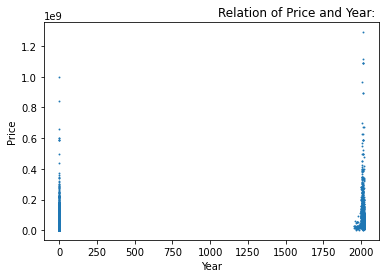

In [29]:
import matplotlib.pyplot as plt
plt.plot( 'year', 'price', data=data, linestyle='', marker='o', markersize=0.9)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Relation of Price and Year: ', loc='right')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d42e92190>,
      dtype=object)

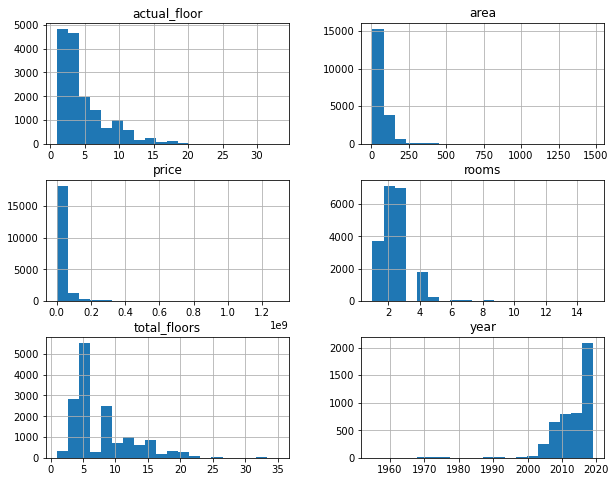

In [7]:
numeric_variables = data.select_dtypes(exclude=['object'])
numeric_variables.hist(figsize=(10,8), bins=20)

On each histogram we can get a few insights:
1. Most of the apatments are located >5 floor
2. Most of the apatments have small area size
3. The most popular apartments have 2 rooms
4. Most of the aparments are build starting from 2000s

Now, for categorical variables, we will look at their frequency distributions. We will use count plot for this.

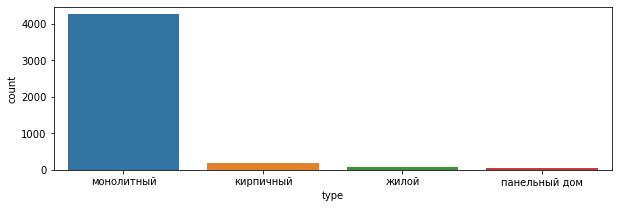

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# this allows plots to appear directly in the notebook
%matplotlib inline

categorical_variables = data.select_dtypes(include=['object'])

plt.figure(figsize=(10,3))
sns.countplot(data = categorical_variables, x='type', order=categorical_variables.type.value_counts().index)

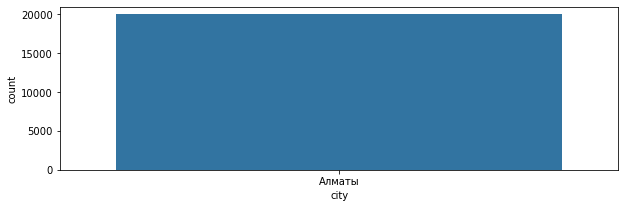

In [9]:
plt.figure(figsize=(10,3))
sns.countplot(data = categorical_variables, x='city', orient='v')

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

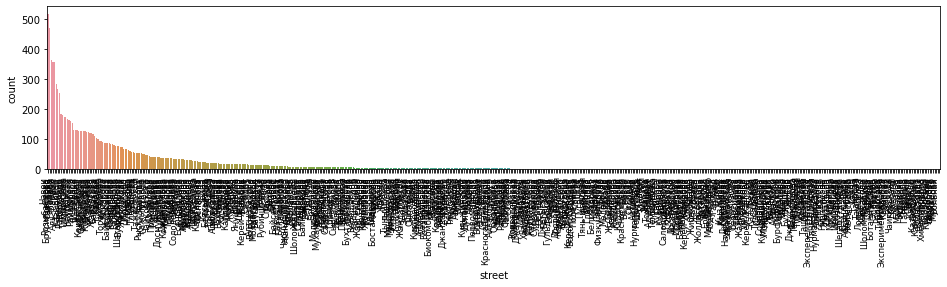

In [10]:
plt.figure(figsize=(16,3))
sns.countplot(data = categorical_variables, x='street', order=categorical_variables.street.value_counts().index)
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

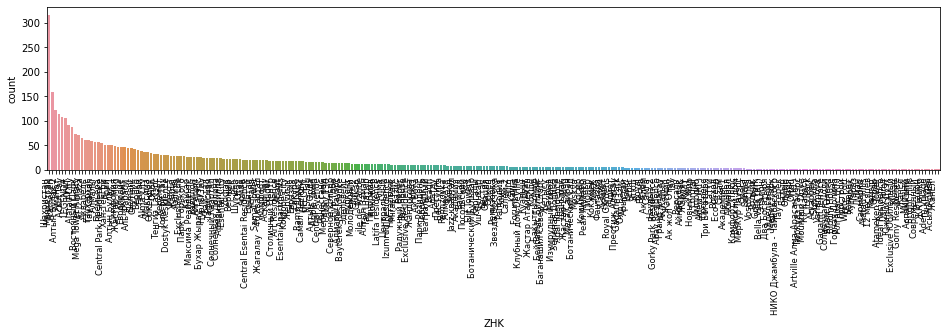

In [11]:
plt.figure(figsize=(16,3))
sns.countplot(data = categorical_variables, x='ZHK', order=categorical_variables.ZHK.value_counts().index)
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)

### 3.2  Data Relationships   <a class="anchor" id="section_3_2"></a>

Let’s have a look at the relationship among various columns.

Text(0.5, 1.05, 'Pearson Correlation of Features')

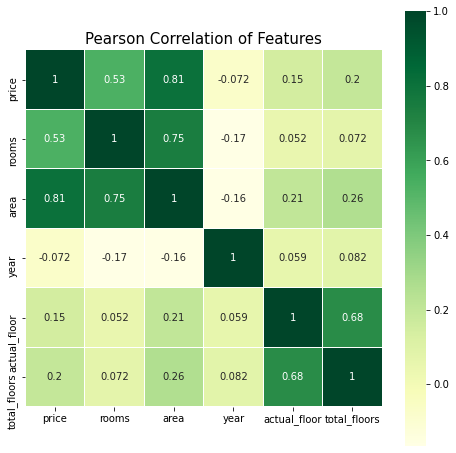

In [12]:
# Compute the correlation matrix 
corr = data.corr()

# Setup the matplotlib figure
f, ax = plt.subplots(figsize=(8,8))

# Generate a custome diverging color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
_ = sns.heatmap(corr, cmap='YlGn', square=True, ax=ax, annot=True, linewidth=0.1)

plt.title('Pearson Correlation of Features', y=1.05, size=15)

## 4 Training the Model <a class="anchor" id="chapter4"></a>

### 4.1 Linear Regression <a class="anchor" id="section_3_1"></a>

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

Example using sklearn library:

In [13]:
from sklearn.linear_model import LinearRegression 
data=data.fillna(0)
lm=LinearRegression()
X = data[['year']]
Y = data['price']

#fit the model, i.e. find the parameters b0 and b1
lm.fit(X, Y)

#obtain preditions
Yhat = lm.predict(X)

#you can view the intercept (b0):
print('Intercept: ', lm.intercept_)

#you can view the slope (b1):
print('Slope or coefficient of the feature (b1): ', lm.coef_[0])

Intercept:  28220786.7632898
Slope or coefficient of the feature (b1):  15483.406730212175


### 4.2 Multiple Linear Regression <a class="anchor" id="section_4_2"></a>

Yhat = b0 + b1 * X1 + b2 * X2

* **High cardinality** - High cardinality means that most of the values in that dataset column are unique (e.g. `street` and `ZHK` columns). Low cardinality, on the other hand, means that many of these values in a dataset column are repeated (in our case `city`, `type`).
* **Multicollinearity** - refers to a situation in which two or more explanatory variables in a multiple regression model are highly linearly related (Wikipedia).
* **Heteroskedasticity** - 

<br>
In order to start introducing other variables we need to do some feature engineering. Linear regression models take numeric variables as inputs. Our dataset has multiple categorical variable that we need to prepare first. Columns `street`, `ZHK` are different - they have many categories (refer to frequency plot above). In order to transfor these nominal categorical variables to numeric we will apply a technique called *count/frequency encoding* - basically replacing a category with its frequency in that column. We won't go too much in detail here. 


In [14]:
# Let's see again how many categories each of these columns have
for col in categorical_variables.columns[:]:
    print(col, ": ", len(categorical_variables[col].unique()), " labels")

street :  557  labels
city :  1  labels
ZHK :  272  labels
type :  5  labels


In [15]:
# Capture frequency values for each column
data.type.value_counts().to_dict()

{0: 15455,
 'монолитный': 4260,
 'кирпичный': 176,
 'жилой': 74,
 'панельный дом': 36}

In [16]:
data.city.value_counts().to_dict()

{'Алматы': 20001}

In [17]:
data.ZHK.value_counts().to_dict()

{0: 15496,
 'Шахристан': 317,
 'Манхеттан': 160,
 'Atameken': 123,
 'Алтын Булак 2': 114,
 'Аманат': 108,
 'Асыл Тау': 106,
 'LEGENDA': 92,
 'КУАТ': 88,
 'Alatau City': 74,
 'Восточный Парк': 71,
 'Mega Tower Almaty': 66,
 'AFD Plaza': 62,
 'Акварель': 61,
 'Гаухартас': 60,
 'Тау Самал': 58,
 'Алмалы': 58,
 'Премьера': 54,
 'Central Park Residence': 51,
 'Хан-Тенгри': 50,
 'Арай': 50,
 'Алтын Булак 1': 49,
 'Жастар Mag': 47,
 'Симфония': 47,
 'Европолис': 46,
 'АкКент': 45,
 'Аль-Фараби': 44,
 'Element': 42,
 'Спутник': 40,
 'Береке': 39,
 'Науаи': 36,
 'Alma City': 36,
 'Максима': 35,
 'Өркендеу': 33,
 'Orion': 32,
 'Тенгиз Тауэрс': 31,
 'Керемет': 31,
 'Толе би Тау': 30,
 'Мечта': 29,
 'Dostyk Residence': 29,
 'Аэлита': 28,
 'Exclusive Life': 28,
 'Жайлы': 28,
 'Максима Резидентс': 27,
 'Парк Горького': 27,
 'Вавилон': 27,
 'Каусар': 27,
 'Айгерим': 26,
 'Нурлы Тау': 25,
 'Бухар Жырау Тауэрс': 25,
 'Талисман': 24,
 'Бай–тал': 24,
 'Солнечный Квартал': 24,
 'Солнечная Долина': 24,
 'E

In [18]:
data.street.value_counts().to_dict()

{0: 8669,
 'Навои': 516,
 'Розыбакиева': 470,
 'Брусиловского': 363,
 'Сатпаева': 358,
 'Гагарина': 356,
 'Толеби': 283,
 'Аль-Фараби': 266,
 'Абая': 252,
 'Казыбекби': 184,
 'Богенбай': 182,
 'Радостовца': 174,
 'Жарокова': 173,
 'Достык': 166,
 'Тимирязева': 163,
 'Айманова': 160,
 'Наурызбай': 153,
 'Гоголя': 132,
 'Райымбека': 131,
 'Манаса': 130,
 'Шевченко': 128,
 'Кекилбайулы': 127,
 'Саина': 127,
 'ЖасКанат': 127,
 'Макатаева': 126,
 'Сейфуллина': 124,
 'Муратбаева': 124,
 'Курмангазы': 120,
 'Егизбаева': 119,
 'Кабанбай': 116,
 'Ауэзова': 111,
 'Жандосова': 103,
 'Байзакова': 102,
 'Кунаева': 94,
 'Карасай': 93,
 'Аккент': 91,
 'Тулебаева': 89,
 'Аскарова': 86,
 'Торайгырова': 86,
 'Клочкова': 86,
 'Байтурсынова': 85,
 'Ходжанова': 83,
 'Панфилова': 82,
 'Назарбаева': 79,
 'Масанчи': 78,
 'Валиханова': 77,
 'Жамбыла': 75,
 'Шагабутдинова': 73,
 'Каблукова': 68,
 'Бухар-Жырау': 68,
 'Желтоксан': 66,
 'Пушкина': 65,
 'Кенесары': 60,
 'Маркова': 58,
 'Нурмакова': 58,
 'Жуалы': 55

In [19]:
frequency_map_ZHK = data.ZHK.value_counts().to_dict()
frequency_map_type = data.type.value_counts().to_dict()
frequency_map_street = data.street.value_counts().to_dict()
frequency_map_city = data.city.value_counts().to_dict()

data.ZHK = data.ZHK.map(frequency_map_ZHK)
data.type = data.type.map(frequency_map_type)
data.street = data.street.map(frequency_map_street)
data.city = data.city.map(frequency_map_city)

data.head()

,price,rooms,area,street,city,ZHK,type,year,actual_floor,total_floors
0,10500000,1,36,1,20001,15496,15455,0.0,9.0,9.0
1,40000000,3,70,16,20001,12,4260,2019.0,10.0,0.0
2,24500000,2,49,16,20001,12,4260,2019.0,2.0,10.0
3,22500000,2,48,16,20001,12,4260,2019.0,5.0,10.0
4,35500000,3,84,16,20001,12,4260,2019.0,8.0,10.0


Now we are ready to feed these variables into our MLR model.

In [20]:
#extract and store predictor variables and store them as Z

Z = data[['ZHK','type','street','city']]

#train the model
lm.fit(Z, data['price'])

#obtain preditions (array of arrays)
Yhat = lm.predict(Z)

#you can view the intercept (b0):
print('Intercept: ', lm.intercept_)

#you can view the slope array([b1, b2, b3, b4]):
print('Slopes / coefficients of the features (b1 to b7): ', lm.coef_)

Intercept:  64025777.12946288
Slopes / coefficients of the features (b1 to b7):  [-1484.50973358  -830.75171925    12.28010083     0.        ]


In [21]:
Yhat

array([28182558.75699074, 60469157.17026399, 60469157.17026399, ...,
       28289002.67094914, 28289002.67094914, 28289002.67094914])

#### The estimated linear model:

**Price = **

<hr>

There is better of way representing model fitting results with **`statsmodels`** package.

### 4.3 Linear Regression using statsmodels  <a class="anchor" id="section_4_3"></a>

In [22]:
import statsmodels.api as sm

X = data[['ZHK','type','street','city']]
y = data['price']

X = sm.add_constant(X)
model = sm.OLS(y, X)

results = model.fit()
#results.params

# Full summary report
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     660.3
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        20:36:54   Log-Likelihood:            -3.7959e+05
No. Observations:               20001   AIC:                         7.592e+05
Df Residuals:                   19997   BIC:                         7.592e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ZHK        -1484.5097    114.103    -13.010      0.0

In [23]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     660.3
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        20:36:54   Log-Likelihood:            -3.7959e+05
No. Observations:               20001   AIC:                         7.592e+05
Df Residuals:                   19997   BIC:                         7.592e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ZHK        -1484.5097    114.103    -13.010      0.000   -1708.161   -1260.858
type        -830.7517    151.467     -5.485      0.000   -1127.640    -533.864
street        12.2801     76.993      0.159      0.873    -138.632     163.193
city        3201.1288     47.288     67.695      0.000    3108.441    3293.817
==============================================================================
Omnibus:                    32618.774   Durbin-Watson:                   1.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         32164005.356
Skew:                          10.742   Prob(JB):                         0.00
Kurtosis:                     198.278   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 5 Model Evaluation with Visualization <a class="anchor" id="chapter5"></a>

### 5.1 Regression Plot <a class="anchor" id="section_5_1"></a>

Regression plots are a good estimate of the relationship between two variables, the strength of the correlation, and the direction of the relationship (positive or negative). The horizontal axis is the independent variable. The vertical axis is the dependent variable. Each point represents a different target point. The fitted line represents the predicted value.

(0.0, 1355331656.087288)

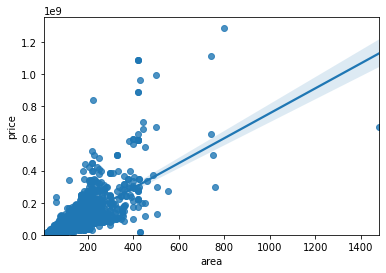

In [24]:
sns.regplot(x='area', y='price', data=data)
plt.ylim(0,)

### 5.2 Resdiual Plot <a class="anchor" id="section_5_2"></a>
The residual plot represents the error between the actual value. Examining the predicted value and actual value we see a difference. We obtain that value by subtracting the predicted value, and the actual target value. We then plot that value on the vertical axis with the independent variable as the horizontal axis. Similarly, for the second sample, we repeat the process. Subtracting the target value from the predicted value. Then plotting the value accordingly. Looking at the plot gives us some insight into our data. We expect to see the results to have zero mean, distributed evenly around the x axis with similar variance. There is no curvature. This type of residual plot suggests a linear plot is appropriate.

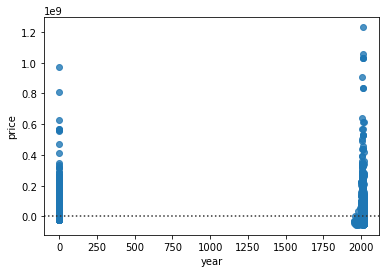

In [25]:
sns.residplot(data['year'], data['price'])

### 5.3 Distribution Plot <a class="anchor" id="section_3_3"></a>
A distribution plot counts the predicted value versus the actual value. These plots are extremely useful for visualizing models with more than one independent variable or feature.

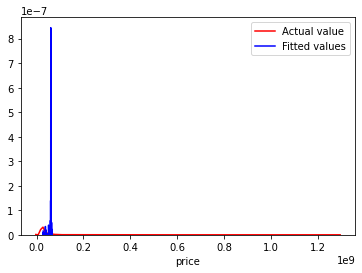

In [26]:
ax1 = sns.distplot(data['price'], hist=False, color='r', label='Actual value')
sns.distplot(Yhat, hist=False, color='b', label='Fitted values', ax=ax1)